Churn Prediction
Identifying customers who are likely to cancel their contract soon.
If the company can do that, it can handle users before churn
The target variable that we want to predict is categorical and has only two possible customers: churn or not churn (Binary Classification)
We also would like to understand why the model thinks our company churn and for that, we want need to be able to interpret the models predictions

Data yang digunakan : https://drive.google.com/file/d/1C7gcJMy3-uZDprlx-aZ67UaNRXHAuPZs/view?usp=sharing 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset
df=pd.read_csv('/content/drive/MyDrive/Portofolio/telco_customer_churn.csv')

In [ ]:
# set the for show max columns
pd.set_option('display.max_columns', None)

# EDA (Exploratory Data Analysis)

In [ ]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1360,3793-MMFUH,Female,1,No,No,13,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.05,1290,Yes
2757,0197-PNKNK,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Bank transfer (automatic),84.45,5848.6,No
6652,0827-ITJPH,Male,0,No,No,36,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),18.55,689,No
4184,0495-ZBNGW,Male,1,Yes,No,5,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.90,343.95,Yes
6286,2717-HVIZY,Female,0,No,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,163.6,No
4894,0533-UCAAU,Male,1,Yes,No,57,Yes,Yes,DSL,No,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),71.10,4140.1,No
3869,1357-BIJKI,Male,0,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,98.25,4858.7,No
4776,0018-NYROU,Female,0,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.5,No
5269,5424-RLQLC,Male,0,No,No,10,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,59.65,638.95,No
4756,9518-IMLHK,Male,0,No,No,31,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),72.45,2156.25,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#TotalCharges is not present above, Let's see dtype of TotalCharges column
np.dtype(df.TotalCharges)

dtype('O')

In [ ]:
#Let's convert it to a numeric type
df.TotalCharges=pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [ ]:
#By looking at the above error, we can understand the reason behind the dtype('o')

len(df[df.TotalCharges==' ']) #We have 11 records with Total Charges value -> ' ' and all these rows have Churn value 'NO', let's remove these rows from our analysis (Having information on Churned customers is more important than info on unchurned records)  


11

Filtering dengan menghapus total changes = missing value

In [ ]:
df=df[df.TotalCharges!=' ']

df.TotalCharges=pd.to_numeric(df.TotalCharges)
np.dtype(df.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


dtype('float64')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df.describe(include='all').loc['unique', :]

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure               NaN
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges       NaN
TotalCharges         NaN
Churn                  2
Name: unique, dtype: object

In [ ]:
df.MultipleLines.value_counts()
# df.DeviceProtection.value_counts()
# df.OnlineBackup.value_counts()
# df.OnlineSecurity.value_counts()
# df.StreamingMovies.value_counts()
# df.StreamingTV.value_counts()
# df.TechSupport.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [ ]:
cat_cols_for_wrangling=['MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','InternetService']

In [ ]:
#Some Data Wrangling.. We will Convert values like 'No Phone Service', 'No Internet Service' to 'No'. In other words, we're creating binary columns (Yes or No)

for col in cat_cols_for_wrangling:
    df[col]=df[col].apply(lambda x: 'No' if 'No' in x else 'Yes')

In [ ]:
def exp2(columns):
    sns.histplot(data=df, x=columns, hue='Churn')
    plt.show()

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
num = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges','Churn']

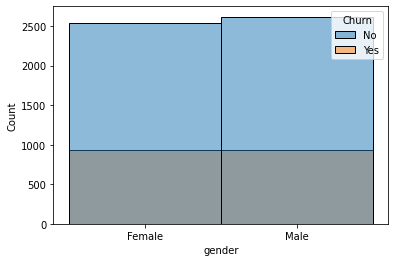

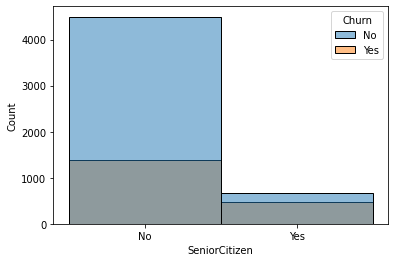

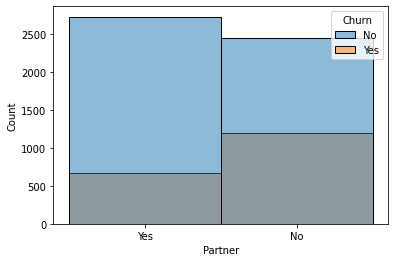

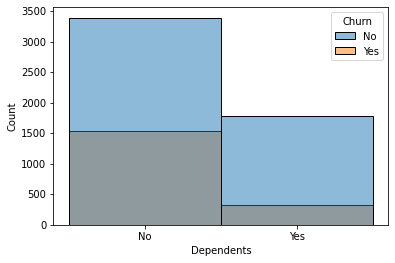

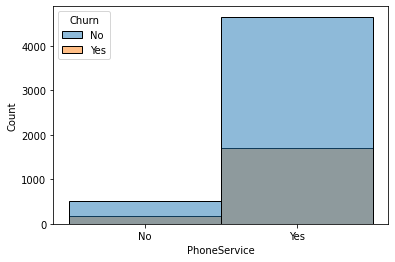

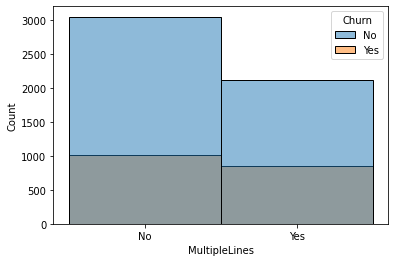

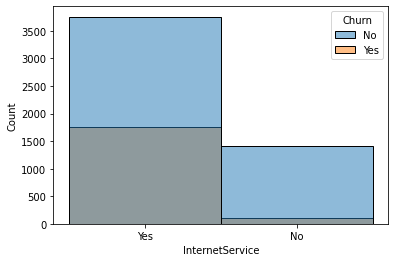

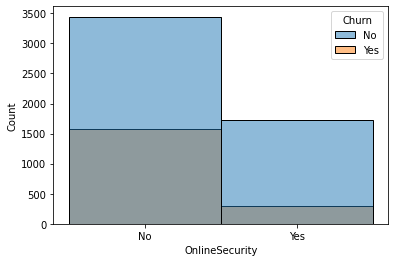

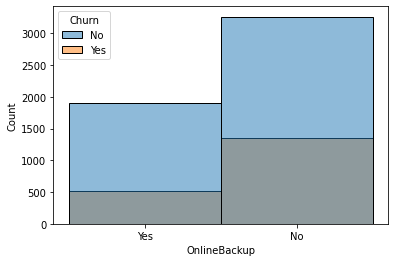

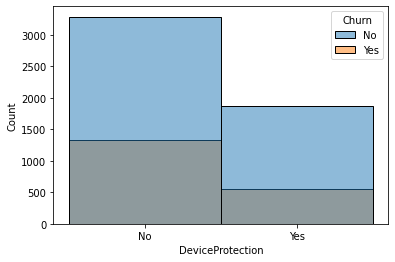

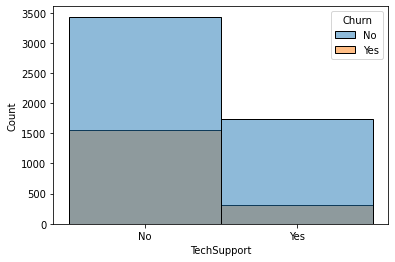

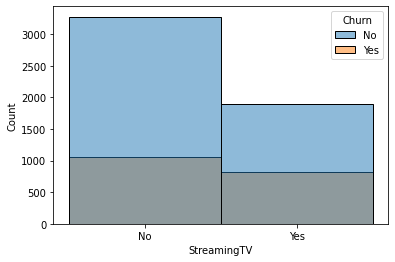

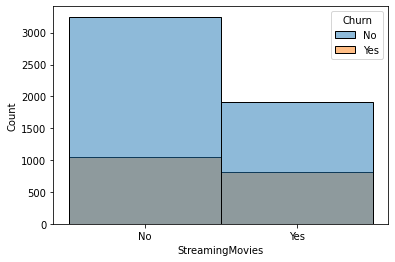

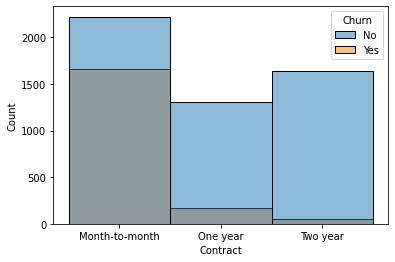

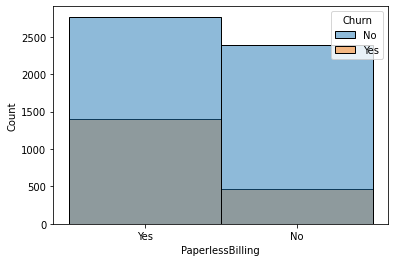

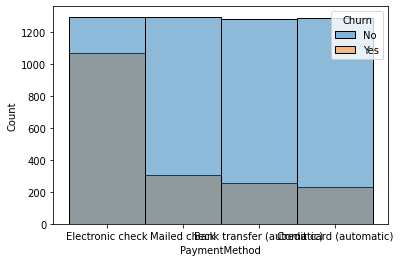

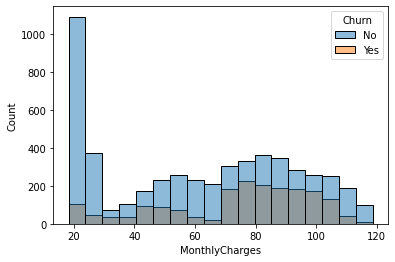

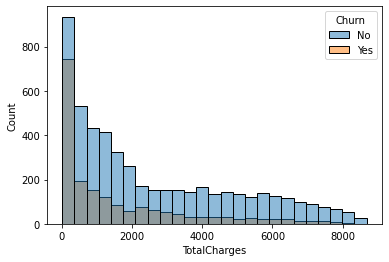

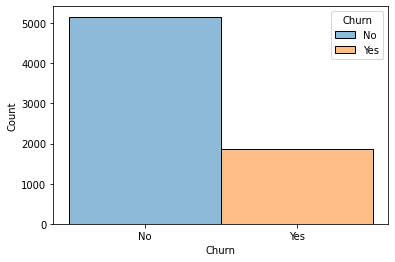

In [ ]:
for feature in num:
    exp2(feature)

In [ ]:
print('count of Churn')
print(df['Churn'].value_counts())
print('% of Churn')
print(df['Churn'].value_counts(normalize=True)*100)

count of Churn
No     5163
Yes    1869
Name: Churn, dtype: int64
% of Churn
No     73.421502
Yes    26.578498
Name: Churn, dtype: float64


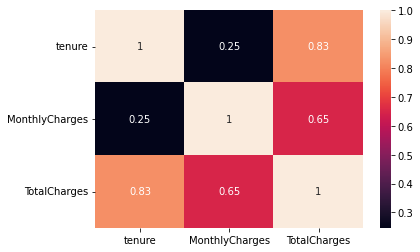

In [ ]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

# Feature Engineering

In [ ]:
#It makes more sense to categorize customers wrt tenure, so let's convert tenure column to tenure range/buckets

def convert_to_buckets(tenure):
    
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'

In [ ]:
df['tenure']=df['tenure'].map(convert_to_buckets)
df['tenure'].value_counts()

0 - 24 months     3199
> 60 months       1407
24 - 36 months     832
48 - 60 months     832
36 - 48 months     762
Name: tenure, dtype: int64

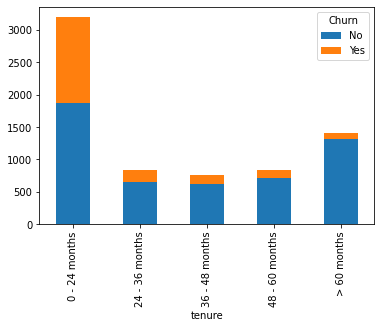

In [ ]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True); #customers with 0-24 months tenure are more likely to churn.. 
#From the plot, it is evident that 'tenure' is an important feature as well./

In [ ]:
cols=df.columns
cols=cols.drop(['customerID','MonthlyCharges','TotalCharges'])
all_cat_cols=list(cols) #All the categorical features that are required for analysis, we'll remove customerID since it's just an ID column with no significance for the analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])

df[all_cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,2,0,0,1,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Churn','customerID','TotalCharges'], axis=1),
    df.Churn,
    test_size= 0.2,
    random_state=0,
    stratify=df.Churn
)

In [ ]:
y_train.value_counts(normalize=True)*100

0    73.422222
1    26.577778
Name: Churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

0    73.418621
1    26.581379
Name: Churn, dtype: float64

# Modeling

Now, We're ready to go for model building, but before we do it.. Let's understand the metrics that matter for this specific problem.


*  Our ultimate goal is to retain as many churning customers as we can. We don't care much if we predict a customer to be churning turns out not churning ie., our Model should have more True positives and less False Negatives. It doesn't matter if we have many False Positives because we care more about no. of false Negatives. The less the no. of False Negatives, the more we're sure about retention.. 


Just to be clear: In our scenario/perspective:

* A False Positive is when we predict a customer to be churning turns out to be not Churning.
* A False Negative is when we predict a customer to be not churning turns out to be Churning.

It doesn't cost us much if we give an exciting offer (expensive for comapany) to a loyal customer who's not about to leave us. But it costs us a lot if we don't interact/give an offer to a customer who's about to leave us soon. (Because It's a standard rule that acquiring a customer costs more than retaining one.)



---

So, the metric we're looking for is  --> **RECALL**

Recall=TP/TP+FN

Recall gives us the measure of - What proportion of Churned Customers have we retained/Predicted. The less False Negatives we get, The more recall we have... Let's go ahead and build the model



In [ ]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

[Text(0.5, 0.875, 'X[14] <= 0.5\nentropy = 0.835\nsamples = 5625\nvalue = [4130, 1495]'),
 Text(0.25, 0.625, 'X[17] <= 69.175\nentropy = 0.985\nsamples = 3113\nvalue = [1783, 1330]'),
 Text(0.125, 0.375, 'X[4] <= 0.5\nentropy = 0.88\nsamples = 1340\nvalue = [939, 401]'),
 Text(0.0625, 0.125, 'entropy = 0.922\nsamples = 1078\nvalue = [715, 363]'),
 Text(0.1875, 0.125, 'entropy = 0.597\nsamples = 262\nvalue = [224, 38]'),
 Text(0.375, 0.375, 'X[4] <= 0.5\nentropy = 0.998\nsamples = 1773\nvalue = [844, 929]'),
 Text(0.3125, 0.125, 'entropy = 0.962\nsamples = 1111\nvalue = [428, 683]'),
 Text(0.4375, 0.125, 'entropy = 0.952\nsamples = 662\nvalue = [416, 246]'),
 Text(0.75, 0.625, 'X[17] <= 93.675\nentropy = 0.35\nsamples = 2512\nvalue = [2347, 165]'),
 Text(0.625, 0.375, 'X[14] <= 1.5\nentropy = 0.24\nsamples = 1898\nvalue = [1823, 75]'),
 Text(0.5625, 0.125, 'entropy = 0.353\nsamples = 870\nvalue = [812, 58]'),
 Text(0.6875, 0.125, 'entropy = 0.122\nsamples = 1028\nvalue = [1011, 17]'),
 

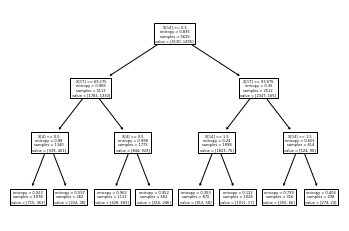

In [ ]:
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train)) 

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 899 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=a858c4595d5eb8e5d8980c1b67eaefe7635a9e1b07a610171776528c09cf7cb7
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
# from sklearn import tree
from dtreeviz.trees import *

In [ ]:
# plt.figure(figsize=(12,8))

In [ ]:
viz = dtreeviz(clf_entropy,
              X_train,
              y_train,
              target_name='Churn',
              feature_names=X_train.columns, 
              class_names=["Not Churn", "Churn"],
              fancy=True )  

viz.view()


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [ ]:
from IPython.core.display import display, HTML
display(HTML(viz.svg()))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
y_pred=clf_entropy.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1139
           1       0.46      0.65      0.54       268

    accuracy                           0.79      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.82      0.79      0.80      1407



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[938,  95],
       [201, 173]])

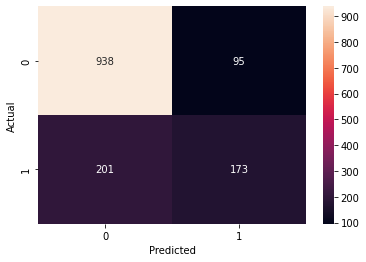

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    np.array(y_test),
        'y_Predicted': np.array(y_pred)
        }

d = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,fmt=".0f")
plt.show()